In [1]:
import numpy as np
import pandas as pd
df = pd.read_excel("avalanche_discrete.xlsx")
df=df.drop("inventory", axis=1)
df.head()

,Elevation,Slope,Aspect,Plan Curvature,Profile Curvature,Topographic Wetness Index,Terrain Roughness Index,Topographic Position Index,Proximity to Road,Proximity to Stream,Average Wind Speed,Average Min Temperature,Average Max Temperature,Average Solar Radiation,Annual Precipitation,Annual Mean Temperature,Lithology,Land Use
0,1,1,3,3,3,3,6,4,1,1,1,6,6,1,3,6,4,1
1,5,1,1,3,3,4,4,4,1,2,4,2,2,5,3,2,2,4
2,4,1,1,3,3,2,4,4,1,1,3,2,3,4,2,3,3,4
3,3,1,0,3,3,4,4,4,1,2,1,4,5,3,1,4,3,2
4,5,2,7,4,3,1,3,4,2,1,3,2,3,4,3,3,3,4


In [2]:
df_columns=df.columns

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df=df, features=df_columns)

,VIF,Tolerance
Elevation,10.220882,0.097839
Slope,1.135451,0.880707
Aspect,1.015646,0.984595
Plan Curvature,1.437923,0.695447
Profile Curvature,1.383773,0.722662
Topographic Wetness Index,1.170039,0.854673
Terrain Roughness Index,1.079920,0.925995
Topographic Position Index,1.358823,0.735931
Proximity to Road,1.204405,0.830286
Proximity to Stream,1.141401,0.876117


In [4]:
df=df.drop("Average Max Temperature", axis=1)
df_columns=df.columns

In [5]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df=df, features=df_columns)

,VIF,Tolerance
Elevation,9.779263,0.102257
Slope,1.135345,0.880790
Aspect,1.015186,0.985041
Plan Curvature,1.437915,0.695452
Profile Curvature,1.383773,0.722662
Topographic Wetness Index,1.169723,0.854903
Terrain Roughness Index,1.078878,0.926889
Topographic Position Index,1.357902,0.736430
Proximity to Road,1.202968,0.831277
Proximity to Stream,1.137266,0.879302


In [6]:
df=df.drop("Average Min Temperature", axis=1)
df_columns=df.columns

In [7]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df=df, features=df_columns)

,VIF,Tolerance
Elevation,9.188243,0.108835
Slope,1.134083,0.881769
Aspect,1.015131,0.985095
Plan Curvature,1.437872,0.695472
Profile Curvature,1.383735,0.722682
Topographic Wetness Index,1.169590,0.855001
Terrain Roughness Index,1.078719,0.927026
Topographic Position Index,1.357630,0.736578
Proximity to Road,1.201654,0.832186
Proximity to Stream,1.123288,0.890244


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-9-0042044597b4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


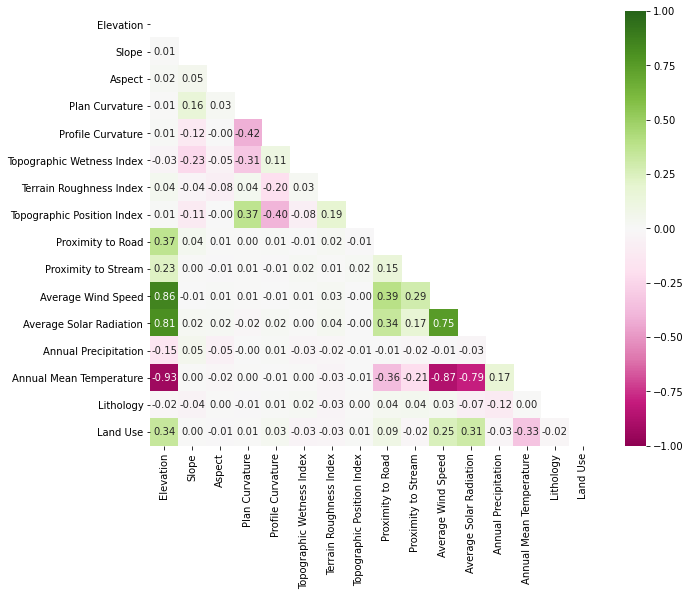

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG', fmt=".2f")
fig.savefig('pearson.jpg', dpi=600,bbox_inches='tight')

In [10]:
df=df.drop("Average Wind Speed", axis=1)
df_columns=df.columns

In [11]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df=df, features=df_columns)

,VIF,Tolerance
Elevation,8.716015,0.114731
Slope,1.132516,0.882990
Aspect,1.015130,0.985095
Plan Curvature,1.436561,0.696107
Profile Curvature,1.380726,0.724257
Topographic Wetness Index,1.167600,0.856458
Terrain Roughness Index,1.078524,0.927193
Topographic Position Index,1.354905,0.738059
Proximity to Road,1.187308,0.842242
Proximity to Stream,1.076959,0.928540


<ipython-input-12-0042044597b4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


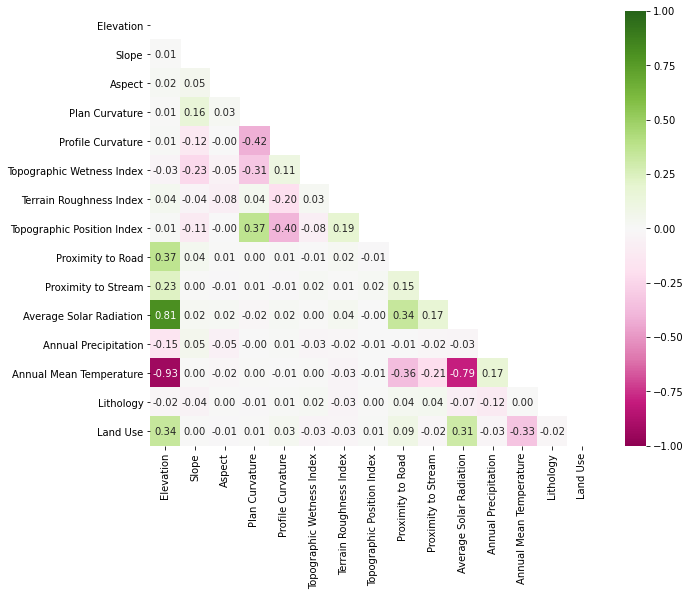

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG', fmt=".2f")
fig.savefig('pearson.jpg', dpi=600,bbox_inches='tight')

In [13]:
df=df.drop("Annual Mean Temperature", axis=1)
df_columns=df.columns

In [20]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df=df, features=df_columns)

,VIF,Tolerance
Elevation,3.308453,0.302256
Slope,1.131798,0.883550
Aspect,1.015010,0.985212
Plan Curvature,1.436559,0.696108
Profile Curvature,1.378692,0.725325
Topographic Wetness Index,1.162989,0.859853
Terrain Roughness Index,1.077632,0.927961
Topographic Position Index,1.354690,0.738176
Proximity to Road,1.185414,0.843587
Proximity to Stream,1.076707,0.928758


<ipython-input-15-0042044597b4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


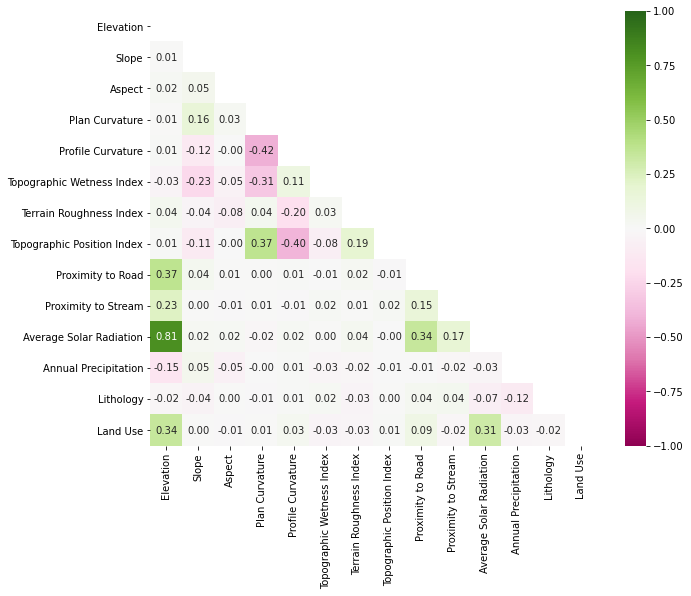

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG', fmt=".2f")
fig.savefig('pearson.jpg', dpi=600,bbox_inches='tight')

In [21]:
df=df.drop("Average Solar Radiation", axis=1)
df_columns=df.columns

In [22]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df=df, features=df_columns)

,VIF,Tolerance
Elevation,1.418454,0.704993
Slope,1.130681,0.884423
Aspect,1.014699,0.985514
Plan Curvature,1.435535,0.696604
Profile Curvature,1.378650,0.725347
Topographic Wetness Index,1.159831,0.862194
Terrain Roughness Index,1.077573,0.928011
Topographic Position Index,1.354690,0.738176
Proximity to Road,1.180857,0.846843
Proximity to Stream,1.076408,0.929016


<ipython-input-23-0042044597b4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


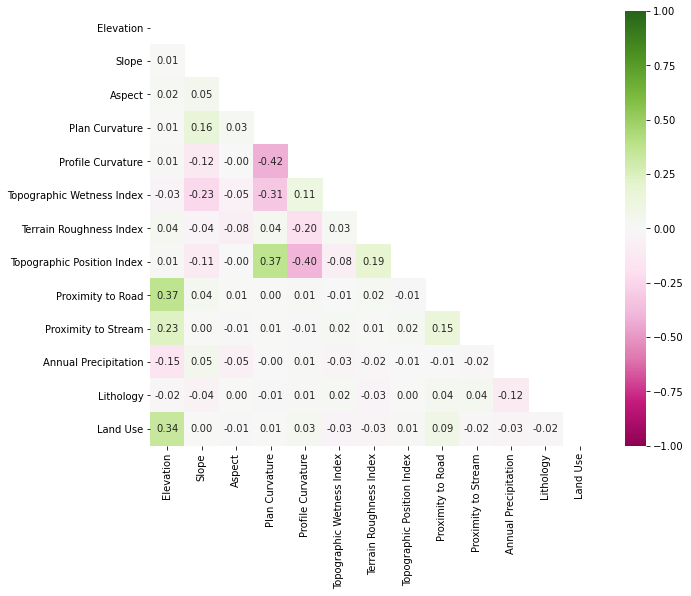

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG', fmt=".2f")
fig.savefig('pearson.jpg', dpi=600,bbox_inches='tight')